In [51]:
%load_ext autoreload
%autoreload 2

import sys
import os
from sklearn.model_selection import train_test_split
project_root = os.path.abspath(os.path.join(os.getcwd(), '../../'))  # return the projest's root folder
sys.path.append(project_root)
#from utils import prepare_scatter_data, plot_column_distribution

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

random_seed = 1
np.random.seed(random_seed)

In [35]:
import glob

# Get all files ending with "dataframe.csv" in the "stanford" folder
file_paths = glob.glob("stanford/*dataframe.csv")

# Read all the files into a dictionary of DataFrames
dataframes = {os.path.basename(file): pd.read_csv(file) for file in file_paths}

/tmp/ipykernel_1095906/4255899988.py:7: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes = {os.path.basename(file): pd.read_csv(file) for file in file_paths}
/tmp/ipykernel_1095906/4255899988.py:7: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes = {os.path.basename(file): pd.read_csv(file) for file in file_paths}
/tmp/ipykernel_1095906/4255899988.py:7: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes = {os.path.basename(file): pd.read_csv(file) for file in file_paths}
/tmp/ipykernel_1095906/4255899988.py:7: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes = {os.path.basename(file): pd.read_csv(file) for file in file_paths}
/tmp/ipykernel_1095906/4255899988.py:7: DtypeWarning: Columns (15) have mixed types. Specify dtype option on

In [54]:
stan = pd.read_csv("stanford/stanford.csv")
stan.SOC.value_counts()

SOC
0.000000      98
100.000000    97
99.997210      8
81.747640      8
75.809685      7
              ..
31.666391      1
31.667809      1
31.669218      1
31.670630      1
31.653687      1
Name: count, Length: 5718352, dtype: int64

In [42]:
stan.to_csv("stanford/stanford.csv", index=False)

In [46]:
stan[stan.SOH < 94].cell.unique(), stan.cell.unique()

(array(['W10', 'W8', 'W9', 'W5', 'G1'], dtype=object),
 array(['W3', 'W10', 'W8', 'W9', 'W7', 'V4', 'V5', 'W5', 'G1', 'W4'],
       dtype=object))

In [29]:
train = pd.read_csv("stanford/train.csv")
valid = pd.read_csv("stanford/valid.csv")
test = pd.read_csv("stanford/test.csv")
train.columns

/tmp/ipykernel_1095906/1450633452.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("stanford/train.csv")
/tmp/ipykernel_1095906/1450633452.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  valid = pd.read_csv("stanford/valid.csv")
/tmp/ipykernel_1095906/1450633452.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv("stanford/test.csv")


Index(['Date', 'voltage', 'current', 'relativeTime', 'temperature', 'cycle',
       'type', 'cell', 'capacity', 'energy', 'SOC', 'SOE', 'ch_cap', 'dis_cap',
       'SOH', 'protocol'],
      dtype='object')

In [49]:
stan[stan.cell == 'V5']

Date   voltage   current  \
v5_dataframe.csv 14719   2021-01-20 19:42:33.786  4.179625 -0.242459   
                 14720   2021-01-20 19:42:34.786  4.179373 -0.242463   
                 14721   2021-01-20 19:42:35.786  4.179246 -0.242479   
                 14722   2021-01-20 19:42:36.786  4.178491 -0.242493   
                 14723   2021-01-20 19:42:37.786  4.178491 -0.242507   
...                                          ...       ...       ...   
                 352218  2021-09-14 08:48:27.162  2.501245 -0.242521   
                 352219  2021-09-14 08:48:28.162  2.500864 -0.242517   
                 352220  2021-09-14 08:48:29.162  2.500461 -0.242521   
                 352221  2021-09-14 08:48:30.162  2.500345 -0.242517   
                 352222  2021-09-14 08:48:30.264  2.499999 -0.242516   

                         relativeTime  temperature  cycle cell  capacity  \
v5_dataframe.csv 14719      14717.327     0.000000      1   V5  4.860248   
                 14720      14718.327     0.000000      1   V5  4.860113   
                 14721      14719.327     0.000000      1   V5  4.860046   
                 14722      14720.327     0.000000      1   V5  4.859979   
                 14723      14721.327     0.000000      1   V5  4.859911   
...                               ...          ...    ...  ...       ...   
                 352218     77656.220    23.290268      4   V5  0.000209   
                 352219     77657.220    23.290268      4   V5  0.000142   
                 352220     77658.220    23.290268      4   V5  0.000074   
                 352221     77659.220    23.235710      4   V5  0.000007   
                 352222     77659.320    23.235704      4   V5  0.000000   

                            energy         SOC         SOE         SOH  
v5_dataframe.csv 14719   17.872248  100.000000  100.000000  100.000000  
                 14720   17.871685   99.997220   99.996860  100.000000  
                 14721   17.871403   99.995840   99.995270  100.000000  
                 14722   17.871122   99.994450   99.993706  100.000000  
                 14723   17.870840   99.993070   99.992130  100.000000  
...                            ...         ...         ...         ...  
                 352218   0.000523    0.004439    0.003022   96.815254  
                 352219   0.000355    0.003010    0.002051   96.815254  
                 352220   0.000187    0.001581    0.001081   96.815254  
                 352221   0.000017    0.000152    0.000099   96.815254  
                 352222   0.000000    0.000000    0.000000   96.815254  

[284605 rows x 12 columns]

In [50]:
'''train_val_cyc, test_cyc = train_test_split(cells, test_size=0.2, random_state=random_seed)
train_cyc, valid_cyc =  train_test_split(train_val_cyc, test_size=0.2, random_state=random_seed)

train = stan[stan['cell'].isin(train_cyc)]
valid = stan[stan['cell'].isin(valid_cyc)]
test = stan[stan['cell'].isin(test_cyc)]'''
#'W3', 'W10', 'W8', 'W9', 'W7', 'V4', 'V5', 'W5', 'G1', 'W4'
train = stan[stan['cell'].isin(['G1', 'W3', 'W7', 'W9', 'W4', 'V4'])]
valid = stan[stan['cell'].isin(['W10', 'W5'])]
test = stan[stan['cell'].isin(['V5', 'W8'])]
train.to_csv("stanford/train.csv", index=False)
valid.to_csv("stanford/valid.csv", index=False)
test.to_csv("stanford/test.csv", index=False)
#stan.to_csv("stanford/stanford.csv", index=False)

In [34]:
train[train.SOH < 95].cell.unique()

array(['W9', 'G1'], dtype=object)

In [31]:
train.cell.unique(), valid.cell.unique(), test.cell.unique()

(array(['W3', 'V5', 'W5'], dtype=object),
 array(['W9'], dtype=object),
 array(['W7'], dtype=object))

In [3]:
# read the data from file
folder_path = ''
path_dict = {'train': f'{folder_path}train.csv',
             'valid': f'{folder_path}valid.csv',
             'test': f'{folder_path}test.csv'}
data_dict = {key: pd.read_csv(path) for key, path in path_dict.items()}

data = pd.concat(data_dict, axis=0)
train, valid, test = data_dict['train'], data_dict['valid'], data_dict['test']

In [4]:
data_groupby =['cycle','capacity']

Distribution of 'current':
count    44281.000000
mean        -2.001943
std          0.145572
min         -2.029098
25%         -2.013533
50%         -2.012512
75%         -2.011495
max          0.005955
Name: current, dtype: float64


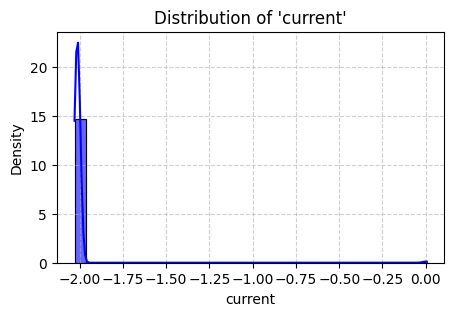

Distribution of 'voltage':
count    44281.000000
mean         3.526245
std          0.231672
min          2.455679
25%          3.410601
50%          3.521293
75%          3.680756
max          4.222491
Name: voltage, dtype: float64


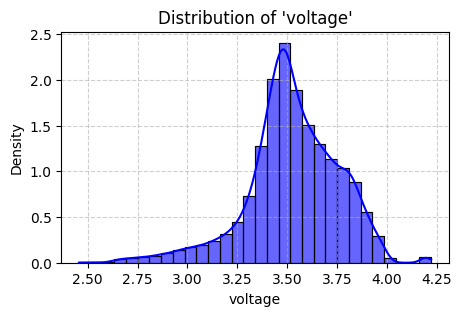

Distribution of 'temperature':
count    44281.000000
mean        32.295784
std          3.739808
min         23.218050
25%         29.846302
50%         32.268619
75%         35.055704
max         41.312405
Name: temperature, dtype: float64


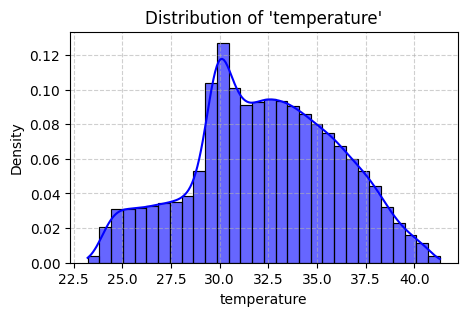

Distribution of 'time_diff':
count    44238.000000
mean        10.485572
std          3.132035
min          0.000000
25%          9.359000
50%          9.375000
75%          9.406000
max         19.969000
Name: time_diff, dtype: float64


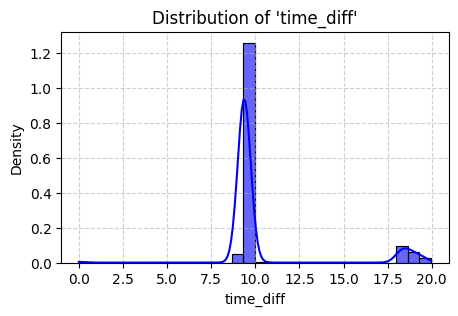

In [5]:
# check the distribution of columns' value -------------------------------------------
plot_column_distribution(data,'current')
plot_column_distribution(data,'voltage')
plot_column_distribution(data,'temperature')

# check the time difference
t = pd.DataFrame()
for idx, group in data.groupby(data_groupby):
    group = group.copy()
    group['relativeTime'] = group.relativeTime - group.relativeTime.iloc[0]
    group = group.sort_values(by='relativeTime', ascending=True)
    group['time_diff'] = group.relativeTime.diff().fillna(group['relativeTime'])
    t = pd.concat([t, group[['cycle','time_diff']]], ignore_index=True)

plot_column_distribution(t,'time_diff', range_limits=(0,20))
# check the distribution of columns' value -------------------------------------------

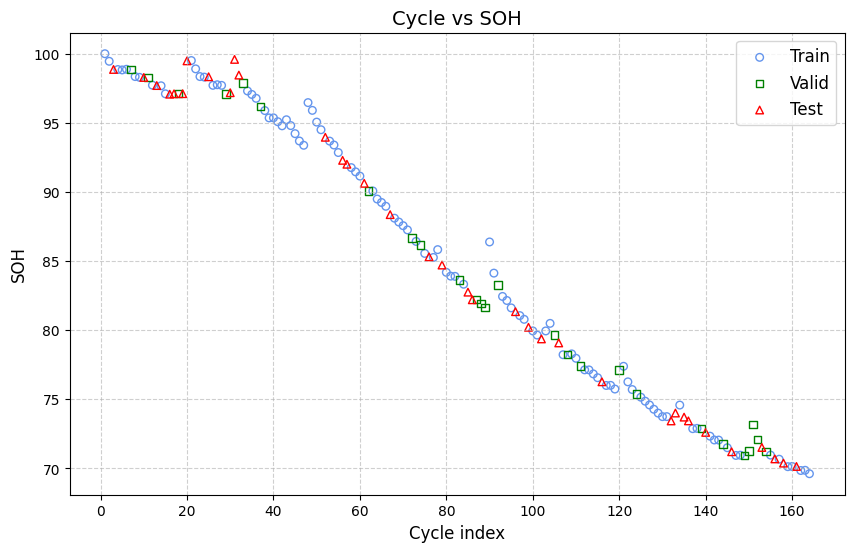

In [6]:
# check the distribution of train, valid, test dataset --------------------------------------------
# The result is three dictionaries: train_info, valid_info, and test_info
train_info, valid_info, test_info = [get_unique_cycle_soh(dataset) for dataset in [train, valid, test]]

plt.figure(figsize=(10, 6))
plt.scatter(*prepare_scatter_data(train_info), 
            facecolors='none', edgecolors='cornflowerblue', label='Train', s=30, marker='o')
plt.scatter(*prepare_scatter_data(valid_info), 
            facecolors='none', edgecolors='green', label='Valid', s=30, marker='s')
plt.scatter(*prepare_scatter_data(test_info), 
            facecolors='none', edgecolors='red', label='Test', s=30, marker='^')

plt.title("Cycle vs SOH", fontsize=14)
plt.xlabel("Cycle index", fontsize=12)
plt.ylabel("SOH", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()
# check the distribution of train, valid, test dataset --------------------------------------------